<a href="https://colab.research.google.com/github/KanoonGammy/Python-for-investing/blob/projects/2_CDC_Action_Zone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import yfinance as yf
import datetime
import mplfinance as mpf

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.8/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


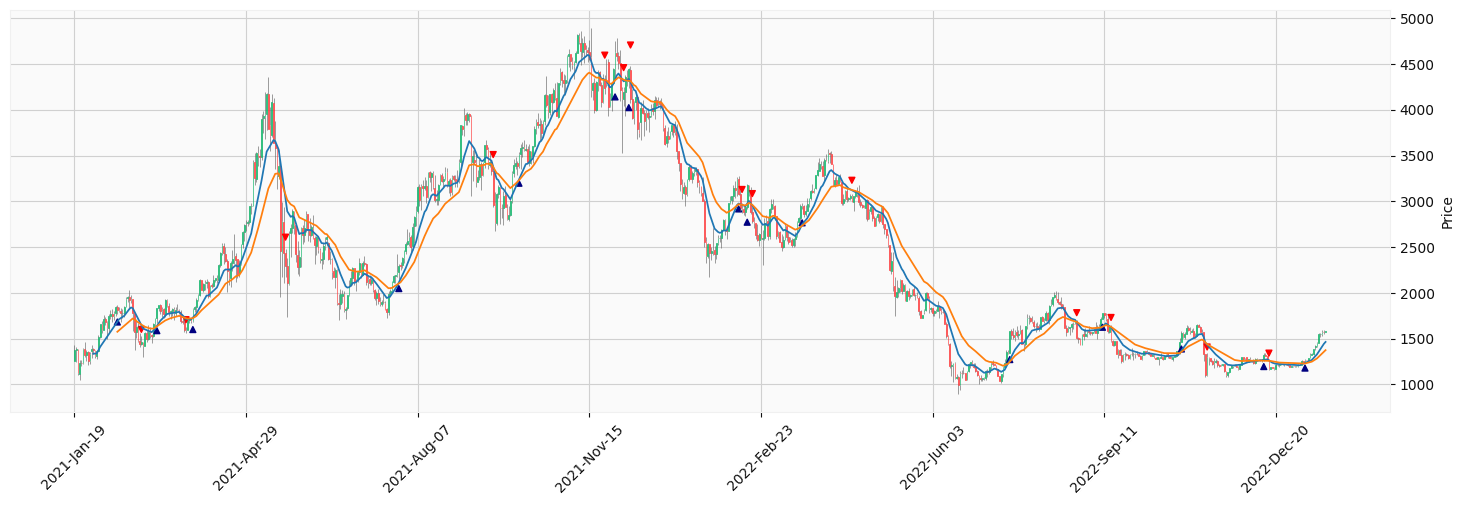

In [27]:
#create data
data = yf.download('ETH-USD', start = datetime.datetime.now() - datetime.timedelta(729) , end = datetime.datetime.now() , interval = '1D')
df = data.copy()

#create cdc 
df['fast'] = df['Close'].ewm(span = 12 , adjust = False , min_periods = 12).mean()
df['slow'] = df['Close'].ewm(span = 26 , adjust = False , min_periods = 26).mean()

#make trend (action zone)
df['trend'] = df['fast'] > df['slow']

#make entry point ,exit point
df.loc[(df['trend'] == True) & (df['trend'].shift() == False) , 'action'] = 'buy'
df.loc[(df['trend'] == False) & (df['trend'].shift() == True) , 'action'] = 'sell'

#make scatter for plot (signal)
df.loc[df['action'] == 'buy' , 'marker_position'] = df['Low'] *0.95
df.loc[df['action'] == 'sell' , 'marker_position'] = df['High'] *1.05

#plot
marks = ['^' if x == 'buy' else 'v' for x in df['action']]
colors = ['navy' if x == 'buy' else 'red' for x in df['action'] ]
signal_position = mpf.make_addplot(df['marker_position'] ,type = 'scatter' , color = colors ,marker = marks )
fast = mpf.make_addplot(df['fast'] , type = 'line')
slow = mpf.make_addplot(df['slow'] , type = 'line')
adds = [signal_position , fast ,slow]
mpf.plot(df , type = 'candle' , style = 'yahoo' , addplot = adds , volume = False, figratio = (10,3) )

In [23]:
import matplotlib.pyplot as plt

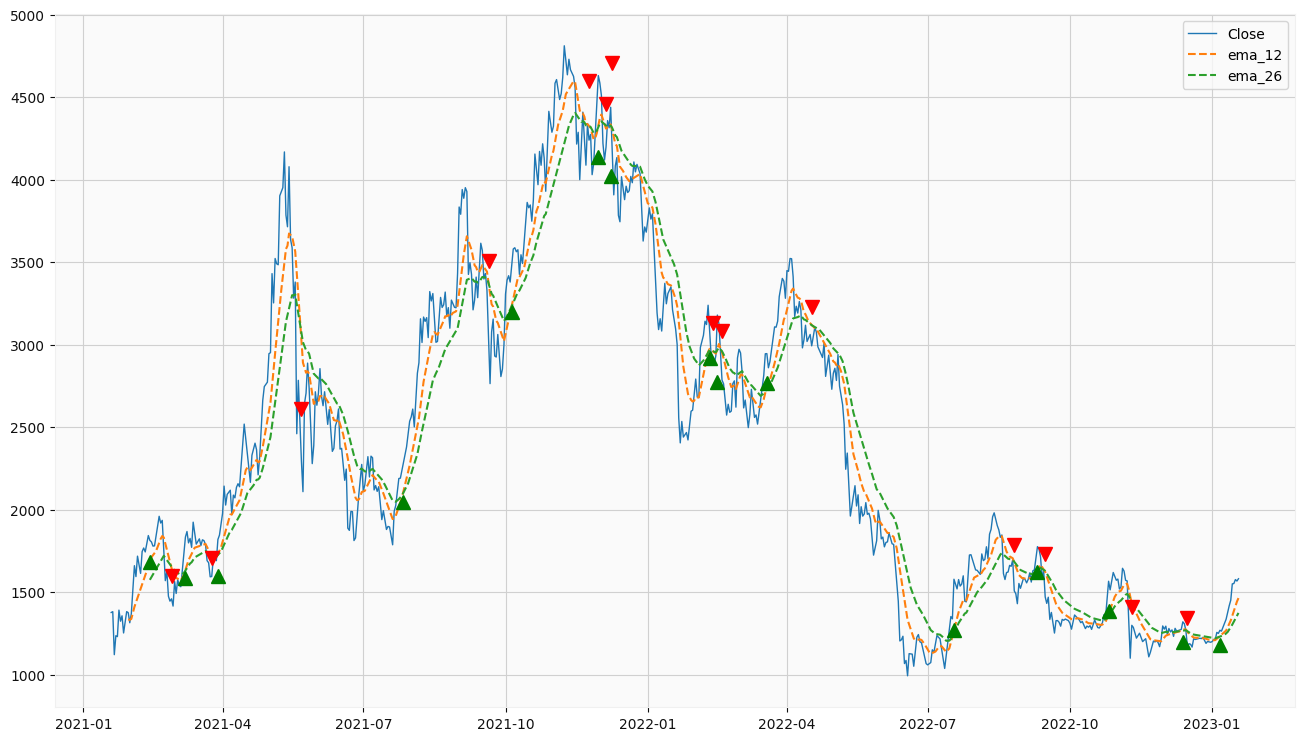

In [36]:
plt.figure(figsize = (16, 9))
plt.plot(df.Close, label ='Close' , lw = 1)
plt.plot(df['fast'] , label = 'ema_12' ,ls ='--')
plt.plot(df['slow'] , label = 'ema_26' ,ls ='--')
plt.plot(df.loc[df['action'] == 'buy'].marker_position , 'g^' , markersize = 10)
plt.plot(df.loc[df['action'] == 'sell'].marker_position , 'rv' , markersize = 10)
plt.legend()